<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados I
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Pacote Seaborn;</li>
  <li>Categorias: Gráficos de Barras e de Setores;</li>
  <li>Tendências: Gráficos de Linha e de Área.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preço do diamante por tipo de corte

In [1]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
diamonds = data[["cut", "price"]].groupby("cut").agg("sum").reset_index()
diamonds.head()

<ipython-input-3-dc5a27e51142>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diamonds = data[["cut", "price"]].groupby("cut").agg("sum").reset_index()


,cut,price
0,Ideal,74513487
1,Premium,63221498
2,Very Good,48107623
3,Good,19275009
4,Fair,7017600


<ipython-input-16-ae39f7018bca>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  grafico =  sns.barplot(data=diamonds, y="cut", x="price", ci=None, palette="pastel")
<ipython-input-16-ae39f7018bca>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  grafico =  sns.barplot(data=diamonds, y="cut", x="price", ci=None, palette="pastel")


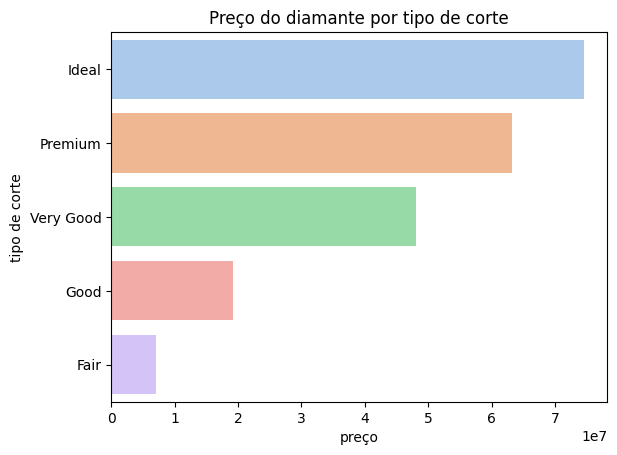

In [16]:
# gráfico do exercício 1

grafico =  sns.barplot(data=diamonds, y="cut", x="price", ci=None, palette="pastel")
grafico.set(title='Preço do diamante por tipo de corte', ylabel='tipo de corte', xlabel='preço');


**Insight do gráfico 1**: ...

O tipo de corte parece ter relação com o preço do diamante, sendo assim quanto melhor o tipo de corte maior o preço

---

## 2\. Número de passageiros em dezembro por ano

In [19]:
import seaborn as sns

data = sns.load_dataset("flights")
data.head(10)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
5,1949,Jun,135
6,1949,Jul,148
7,1949,Aug,148
8,1949,Sep,136
9,1949,Oct,119


In [21]:
# gráfico do exercício 2
import pandas as pd
import numpy as np
flights = data.query('month == "Dec"').reset_index()
flights.head()

,index,year,month,passengers
0,11,1949,Dec,118
1,23,1950,Dec,140
2,35,1951,Dec,166
3,47,1952,Dec,194
4,59,1953,Dec,201


In [ ]:
grafico = sns.barplot(data=flights, x='year', y='passengers', palette='dark')
grafico.set(title='Passageiros em dezembro por ano', xlabel='Ano', ylabel='Passageiros')

<ipython-input-26-65e7bba2d047>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico = sns.barplot(data=flights, x='year', y='passengers', palette='Blues')


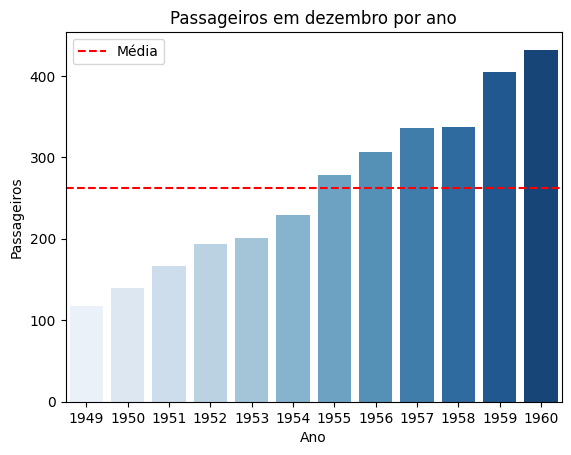

In [26]:
import matplotlib.pyplot as plt
grafico = sns.barplot(data=flights, x='year', y='passengers', palette='Blues')
grafico.set(title='Passageiros em dezembro por ano', xlabel='Ano', ylabel='Passageiros')
# Cálculo da média de passageiros
media_passageiros = flights['passengers'].mean()

# Adiciona uma linha horizontal na média
plt.axhline(y=media_passageiros, color='r', linestyle='--', label='Média')

# Adiciona a legenda
plt.legend()

# Exibe o gráfico
plt.show()

**Insight do gráfico 2**: ...

O grafico mostra o numero de passageiros entre os anos de 1949 e 1960. Podemos ver que desde o começo o numero de passageiros foi aumentando, porem em 1955 foi o ano que deu uma dispara significativa em comparação ao ano anterior, e tambem foi o ano que ultrapassou a média de passageiros, o que mostra que a demanda por viagens aéreas se tornou significativamente mais alta, impulsionando um crescimento acelerado no setor a partir deste ano.



---

## 3\. Numero de passageiros por mês entre 1949 e 1959

In [20]:
import seaborn as sns

data = sns.load_dataset("flights")
data.head(10)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
5,1949,Jun,135
6,1949,Jul,148
7,1949,Aug,148
8,1949,Sep,136
9,1949,Oct,119


In [30]:
# gráfico do exercício 3
import matplotlib.pyplot as plt

flights = data.query('1949 <= year < 1960').reset_index()
flights.head()

,index,year,month,passengers
0,0,1949,Jan,112
1,1,1949,Feb,118
2,2,1949,Mar,132
3,3,1949,Apr,129
4,4,1949,May,121


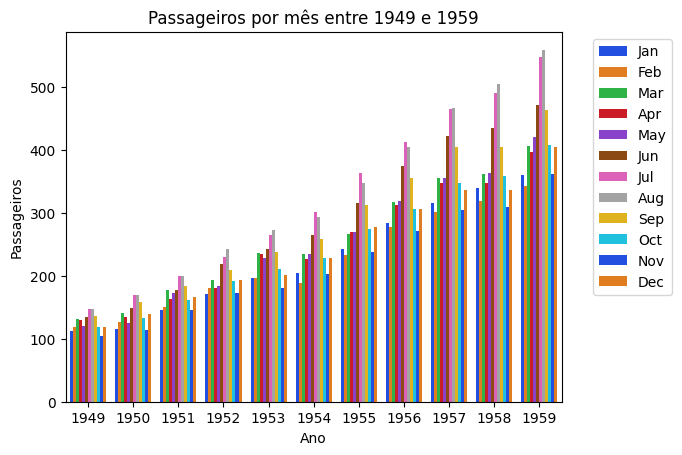

In [31]:
grafico = sns.barplot(data=flights, x='year', y='passengers', hue='month', palette='bright')
grafico.set(title='Passageiros por mês entre 1949 e 1959', xlabel='Ano', ylabel='Passageiros')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

**Insight do gráfico 3**: O grafico mostra que ao longo dos anos , o momento que é mais movimentado é na metade do ano , mais especificamente nos meses de julho e agosto , que coincide com as férias de meio de ano, e tambem mostra que o setor é mais movimentado nas ferias de meio de ano do que no começo e fim de ano.

---